<a href="https://colab.research.google.com/github/GerardoMunoz/clasificador_simple/blob/main/clasificador_una_capa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Entrenamiento de la Red Neuronal Artificial (ANN) en Colab para identificar una sola etiqueta.

Si se ejecuta desde Colab, hay que subir un archivo 'imagenes.zip' con las imágenes a clasificar en sus respectivos directorios. En este ejemplo tiene tres directorios. 
```
imagenes
 - animal
 - flor
 - otra
```

Sin embargo, sólo usaremos dos directorios.

A continuación se listan los archivos en el directorio actual

In [3]:
!ls -l

total 10000
-rw-r--r-- 1 root root 10232141 Mar 23 05:38 imagenes.zip
drwxr-xr-x 1 root root     4096 Mar  9 14:48 sample_data


Revise que el archivo 'imagenes.zip' haya subido bien, ya que archivos muy extensos no suben bien. Por eso es importante, antes de comprimir las imágenes, bajarles la resolución, por ejemplo a 124x124.

A continuación se descomprime el archivo de las imágenes. 

In [4]:
from zipfile import ZipFile

with ZipFile('imagenes.zip', 'r') as zipObj:
   zipObj.extractall()

In [5]:
!ls 

imagenes  imagenes.zip	sample_data


Se supones que dentro del directorio imágenes hay dos carpetas: animal y flor

In [6]:
!ls imagenes  

animal	flor  otra


In [7]:
import numpy as np
import tensorflow as tf
import cv2
import os

Se crea una lista con la ruta y el nombre de cada imagen

In [8]:
etiqueta_a_clasificar = 'flor'

tres_caract_tipos = ('.jpg','.png')
etiquetas = ['otra',etiqueta_a_clasificar]
X_data = []
Y_labels = []
Y_Encoded = []

camino = 'imagenes/'
#carpetas = os.listdir(camino)
path = []
for i,etiqueta in  enumerate(etiquetas):#carpetas:
    for nombre_imagen in  os.listdir(camino + etiqueta):
        if nombre_imagen[-4:] in tres_caract_tipos:
            nombre_completo = camino + etiqueta + "/" + nombre_imagen
            #print(nombre_completo)
            #path.append(nombre_completo)
            #label = path[i].split("/")[-2]
            image = cv2.imread(nombre_completo)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (124,124))
            X_data.append(image)
            Y_labels.append(etiqueta)
            Y_Encoded.append(i)#[0]*i+[1]+[0]*(len(etiquetas)-i-1))

In [9]:
type(path)

list

In [10]:
len(path)

0

Se leen las imágenes y sus etiquetas

In [11]:
Y_labels[0]

'otra'

In [12]:
x_array = np.array(X_data)
y_array = np.array(Y_labels)
y_Encoded = np.array(Y_Encoded)

In [13]:
x_array.shape

(198, 124, 124, 3)

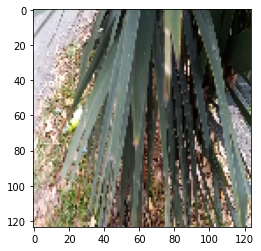

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(x_array[0])

In [15]:
y_array.shape

(198,)

Asigna un número a cada etiqueta

In [16]:
y_array

array(['otra', 'otra', 'otra', 'otra', 'otra', 'otra', 'otra', 'otra',
       'otra', 'otra', 'otra', 'otra', 'otra', 'otra', 'otra', 'otra',
       'otra', 'otra', 'otra', 'otra', 'otra', 'otra', 'otra', 'otra',
       'otra', 'otra', 'otra', 'otra', 'otra', 'otra', 'otra', 'otra',
       'otra', 'otra', 'otra', 'otra', 'otra', 'otra', 'otra', 'otra',
       'otra', 'otra', 'otra', 'otra', 'otra', 'otra', 'otra', 'otra',
       'otra', 'otra', 'otra', 'otra', 'otra', 'otra', 'otra', 'otra',
       'otra', 'otra', 'otra', 'otra', 'otra', 'otra', 'otra', 'otra',
       'otra', 'otra', 'otra', 'otra', 'otra', 'otra', 'otra', 'otra',
       'otra', 'otra', 'otra', 'otra', 'otra', 'otra', 'otra', 'otra',
       'otra', 'otra', 'otra', 'otra', 'otra', 'otra', 'otra', 'otra',
       'otra', 'otra', 'otra', 'otra', 'otra', 'otra', 'otra', 'otra',
       'otra', 'otra', 'flor', 'flor', 'flor', 'flor', 'flor', 'flor',
       'flor', 'flor', 'flor', 'flor', 'flor', 'flor', 'flor', 'flor',
      

In [17]:
y_Encoded 
# 0: otra
# 1: etiqueta_a_clasificar

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [18]:
y_Encoded.shape

(198,)

Se separa el 20% de las imágenes para realizar pruebas después de entrenar

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_array, y_Encoded, test_size = 0.2, random_state = 42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape 

((158, 124, 124, 3), (40, 124, 124, 3), (158,), (40,))

In [20]:
np.min(x_train),  np.max(x_train)

(0, 255)

In [21]:
x_train_norm = x_train/255. 
x_test_norm = x_test/255.

In [22]:
np.min(x_train_norm),  np.max(x_train_norm)

(0.0, 1.0)

Se define el modelo de la red neuronal. En este caso es suficiente con un modelo sencillo, de una sola capa, ya que las imágenes a clasificar son fácilmente diferenciables.

In [23]:
model=tf.keras.Sequential()
model.add(tf.keras.layers.Flatten()) #Convierte los datos de 2D a 1D 
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [24]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy', metrics=['accuracy'])

In [25]:
model.fit(x_train_norm,y_train,          
          validation_data=(x_test_norm,y_test),
          epochs=4,
          batch_size=32)

Epoch 1/4
5/5 [==============================] - 1s 44ms/step - loss: 4.0420 - accuracy: 0.5253 - val_loss: 2.9087 - val_accuracy: 0.4750
Epoch 2/4
5/5 [==============================] - 0s 13ms/step - loss: 0.9509 - accuracy: 0.6709 - val_loss: 0.3900 - val_accuracy: 0.8500
Epoch 3/4
5/5 [==============================] - 0s 10ms/step - loss: 0.2274 - accuracy: 0.8987 - val_loss: 0.2169 - val_accuracy: 0.9000
Epoch 4/4
5/5 [==============================] - 0s 9ms/step - loss: 0.1616 - accuracy: 0.9177 - val_loss: 0.1684 - val_accuracy: 0.9500


En este caso se obtuvo una exactitud de validación (val_accuracy) superior al 0.8. Es decir que se clasificó bien más del 80% de las imágenes.

In [26]:
_, acc_test = model.evaluate(x_test_norm,y_test)
acc_test

2/2 [==============================] - 0s 4ms/step - loss: 0.1684 - accuracy: 0.9500


0.949999988079071

In [27]:
_, acc_train = model.evaluate(x_train_norm,y_train)
acc_train

5/5 [==============================] - 0s 5ms/step - loss: 0.0397 - accuracy: 0.9937


0.9936708807945251

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 46128)             0         
                                                                 
 dense (Dense)               (None, 1)                 46129     
                                                                 
Total params: 46,129
Trainable params: 46,129
Non-trainable params: 0
_________________________________________________________________


0.0

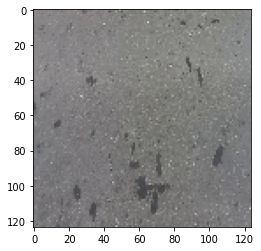

In [29]:
x=x_test[0,...]
imgplot = plt.imshow(x)
x = np.expand_dims(x, axis=0)
preds = model.predict(x)
preds[0,0]
# 0: ot__r_
# 1: etiqueta_a_clasificar

# Se guardan los pesos de la matriz

In [30]:
pesos = model.layers[1].weights[0].numpy()
pesos

array([[ 0.01169823],
       [-0.00558724],
       [-0.00377247],
       ...,
       [-0.00711755],
       [-0.00181198],
       [-0.00520372]], dtype=float32)

In [31]:
base=model.layers[1].weights[1].numpy()
base

array([0.00119052], dtype=float32)

Finalmente se almacenan en un archivo con extensión `.npy`, el cual contiene el modelo entrenado de la Red Neuronal. Esto con el fin de poderlo descargar y clasificar imágenes.

In [32]:
model_name = 'clasifica_'+etiqueta_a_clasificar+'.npy'
#model.save(model_name, save_format='h5')
with open(model_name,'wb') as arch:
    np.save(arch, pesos)
    np.save(arch, base) 

# Leer el modelo entrenado en una  RPI

A continuación, se muestra cómo se puede utilizar el modelo almacenado para clasificar imágenes.

In [33]:
#loaded_model = tf.keras.models.load_model(model_name)
with open(model_name,'rb') as arch:
    pesos_leidos = np.load(arch)[:,0]
    base_leida = np.load(arch)[0]

pesos_leidos


array([ 0.01169823, -0.00558724, -0.00377247, ..., -0.00711755,
       -0.00181198, -0.00520372], dtype=float32)

In [34]:
pesos_leidos.shape

(46128,)

In [35]:
num_param=pesos_leidos.shape[0]
num_param

46128

In [36]:
base_leida

0.0011905214

In [37]:
n=int(np.sqrt(num_param/3))
n

124

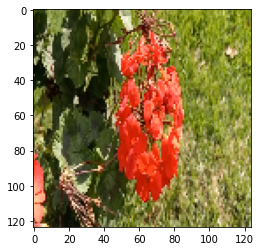

In [38]:


image = cv2.imread('imagenes/flor/0001.png') # Si sale error, cambie el nombre por una imagen que sí exista
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, (n,n))
plt.imshow(image)


La capa densa anterior corresponde a un producto punto seguido de una función sigmoide.

La función sigmoide aproxima los negativos a cero y los positivos a uno. 

Si no se implementa la función sigmoide, entonces hay que evaluar si es positivo o negativo

In [39]:
imagen_plana = (image/255).reshape(num_param)
np.dot(imagen_plana,pesos_leidos)+base_leida

# neg: otra
# pos: etiqueta_a_clasificar

7.272552157713992

# Exactitud (Accuracy)
A continuación medimos la exactitud utilizando los conjuntos de prubaa y entrenamiento

In [76]:
def acc(x_test_norm,y_test):
    salidas=[]
    cont_igual=0
    tot_im=len(y_test)
    for i in range(tot_im):
        pred=np.dot(x_test_norm[i,...].reshape(num_param),pesos_leidos)+base_leida
        salidas.append(pred)
        if (np.sign(pred)+1)//2 == y_test[i]: # La función sigmoide aproxima los negativos a cero y los positivos a 1
            cont_igual += 1
    print(cont_igual,cont_igual/tot_im)
    return salidas

salidas_test = acc(x_test_norm,y_test)


38 0.95


In [77]:
salidas_train = acc(x_train_norm,y_train)


157 0.9936708860759493


Los anteriores valores coinciden con los medidos con tensorflow.

In [81]:
acc_test, acc_train

(0.949999988079071, 0.9936708807945251)

# Visualización de imágenes

-2.4467690357938072

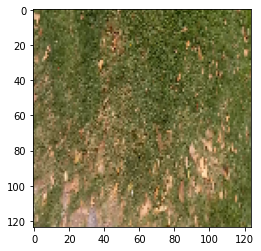

In [82]:
image = cv2.imread('imagenes/otra/0342.png') # Si sale error, cambie el nombre por una imagen que sí exista
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, (124,124))
imgplot = plt.imshow(image)
x = np.expand_dims(image, axis=0)
imagen_plana = (image/255).reshape(num_param)
np.dot(imagen_plana,pesos_leidos)+base_leida
# neg: otra
# pos: etiqueta_a_clasificar

In [83]:
x_train_norm.shape

(158, 124, 124, 3)

0 -7.380457281943431


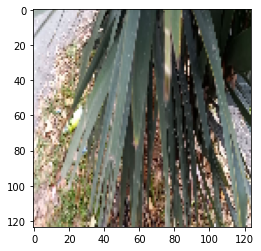

In [84]:
plt.imshow(x_train_norm[60,...]) 
print(y_train[60],salidas_train[60])

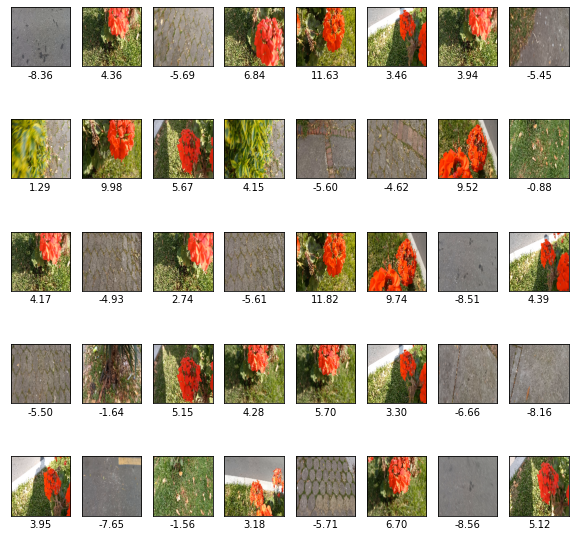

In [85]:


numbers_to_display = 40
#num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(10,10))
for i in range(40):
    plt.subplot(5, 8, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test_norm[i,...], cmap=plt.cm.binary)
    plt.xlabel(f'{salidas_test[i]:.2f}')
plt.show()

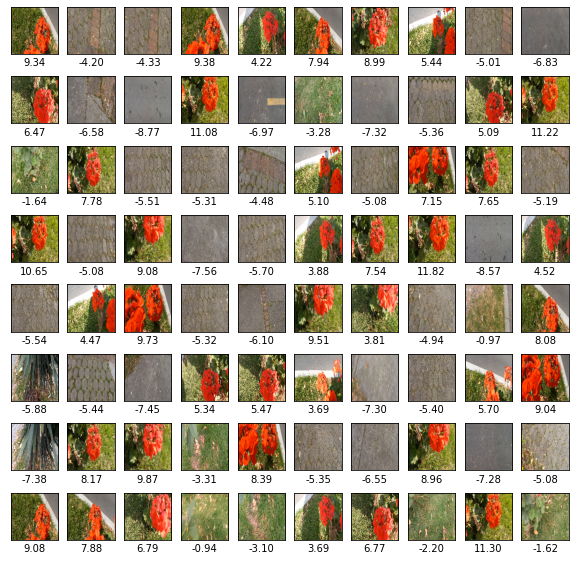

In [86]:
numbers_to_display = 80
#num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(10,10))
for i in range(numbers_to_display):
    plt.subplot(8, 10, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train_norm[i,...], cmap=plt.cm.binary)
    plt.xlabel(f'{salidas_train[i]:.2f}')
plt.show()

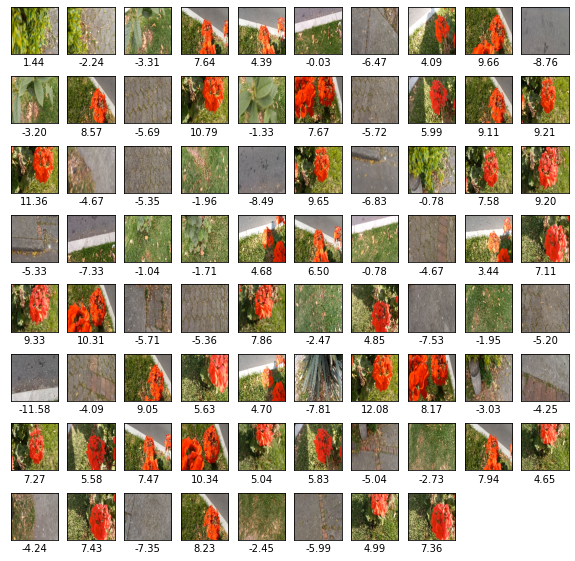

In [87]:
numbers_to_display = 78
#num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(10,10))
for i in range(numbers_to_display):
    plt.subplot(8, 10, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train_norm[i+80,...], cmap=plt.cm.binary)
    plt.xlabel(f'{salidas_train[i+80]:.2f}')
plt.show()